##  Entrenando un modelo de regresión lineal con tus propios datos

En este ejercicio entrenarás un modelo de **regresión lineal** utilizando la biblioteca `Scikit-learn`, que predice el precio de una casa según sus metros cuadrados.

A continuación, seguirás estos pasos:

1. **Subir un archivo CSV** desde tu computador (`precios_casas.csv`).
2. **Leer los datos** usando `pandas`.
3. **Separar las variables** en independientes (X) y dependientes (y).
4. **Dividir los datos** en conjuntos de entrenamiento y prueba.
5. **Entrenar un modelo** con `LinearRegression`.
6. **Verificar que el modelo fue entrenado correctamente**.

 Este flujo representa el corazón del aprendizaje automático supervisado: entrenar un modelo a partir de datos reales para hacer predicciones.

⬇️ Corre la siguiente celda de código para realizar todos los pasos de forma integrada.


In [16]:
# Paso 1: Subir el archivo CSV desde tu computador
from google.colab import files
uploaded = files.upload()  # Se abrirá un cuadro para seleccionar el archivo local (ej. precios_casas.csv)

# Paso 2: Importar librerías necesarias
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd

# Paso 3: Leer el archivo subido
df = pd.read_csv("precios_casas.csv")  # Asegúrate de que el archivo tenga este nombre exacto

# Paso 4: Preparar variables
X = df[['metros_cuadrados']]  # Variable independiente
y = df['precio']              # Variable dependiente

# Paso 5: Separar datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 6: Crear y entrenar el modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Paso 7: Confirmación
print("Modelo entrenado correctamente con los datos cargados.")


Saving precios_casas.csv to precios_casas (2).csv
Modelo entrenado correctamente con los datos cargados.


##  Predicción y análisis de resultados

Una vez entrenado y visualizado el modelo, es momento de ponerlo a prueba:  
**¿Qué tan bien predice los precios de casas que nunca antes había visto?**

En esta etapa usaremos el conjunto de prueba (`X_test`) y compararemos:

- **Precio real**: el que está en el dataset.
- **Precio predicho**: el estimado por el modelo.

Este análisis es clave para evaluar si el modelo está aprendiendo correctamente o si necesita ajustes.

📌 A continuación verás una tabla con los primeros casos del conjunto de prueba.


## Mejora visual: Formatear precios con separadores de miles

Al ejecutar el modelo, es común que los valores numéricos se muestren en **notación científica** (por ejemplo: `8.856719e+07`). Aunque este formato es útil para cálculos, **no es amigable para lectura humana**, especialmente cuando trabajamos con precios o montos de dinero.

Por eso, en esta etapa aplicamos **formato con separadores de miles**, para facilitar la interpretación:

- `88567190` → `88,567,190`
- `134338048` → `134,338,048`

Este pequeño ajuste tiene un gran impacto en la **presentación profesional de resultados**, algo muy valorado al compartir modelos con equipos de negocio o clientes.

📌 En la siguiente celda de código verás cómo se aplica este formato para que puedas visualizar fácilmente y comparar los precios reales con los estimados.


## 💾 Guardar tus resultados como archivo CSV

Una parte importante del trabajo como Ingeniero/a de Datos es **generar archivos con resultados**, ya sea para:

- Entregar reportes a un equipo de negocio o cliente.
- Guardar registros procesados para futuras etapas.
- Hacer trazabilidad de predicciones.
- Integrar modelos en flujos automatizados.

En este ejercicio guardaremos una tabla con:

- Los metros cuadrados de las viviendas.
- El precio real según el dataset.
- El precio predicho por el modelo.

📁 El archivo generado será un `.csv`, un formato ampliamente usado en ciencia de datos.  
Puedes descargarlo y compartirlo como evidencia del trabajo realizado.


In [18]:
import pandas as pd
from google.colab import files

# Crear DataFrame comparativo
resultado = pd.DataFrame({
    'Metros cuadrados': X_test.values.flatten(),
    'Precio real (CLP)': y_test.values,
    'Precio predicho (CLP)': predicciones
})

# Aplicar formato de miles para visualización
resultado['Precio real (CLP)'] = resultado['Precio real (CLP)'].map('{:,.0f}'.format)
resultado['Precio predicho (CLP)'] = resultado['Precio predicho (CLP)'].map('{:,.0f}'.format)

# Mostrar los primeros 5 resultados en la notebook
print("🧾 Resultados (formato amigable):")
display(resultado.head())

# Exportar CSV original (sin formateo, para análisis)
# Rehacer sin el formateo de string
resultado_sin_formato = pd.DataFrame({
    'Metros cuadrados': X_test.values.flatten(),
    'Precio real (CLP)': y_test.values,
    'Precio predicho (CLP)': predicciones
})

# Guardar y descargar
resultado_sin_formato.to_csv("predicciones_resultado.csv", index=False)
files.download("predicciones_resultado.csv")



🧾 Resultados (formato amigable):


,Metros cuadrados,Precio real (CLP),Precio predicho (CLP)
0,85,"88,000,000","88,567,185"
1,35,"42,000,000","42,796,322"
2,135,"134,000,000","134,338,048"


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 🔹 2.3 Visualización del modelo entrenado

Ahora que hemos entrenado y probado el modelo, es hora de **ver gráficamente cómo se ajusta a los datos reales**.

Visualizar los resultados te permite:

- Entender si el modelo está siguiendo bien la tendencia de los datos.
- Detectar posibles desviaciones o errores sistemáticos.
- Comunicar resultados de forma clara a otros equipos.

En este gráfico veremos:

- **Puntos azules**: los datos reales de prueba (precio real de las casas).
- **Línea roja**: la predicción que realiza el modelo lineal.

📌 Si la línea roja atraviesa la nube de puntos, significa que el modelo ha aprendido correctamente la relación entre tamaño y precio.


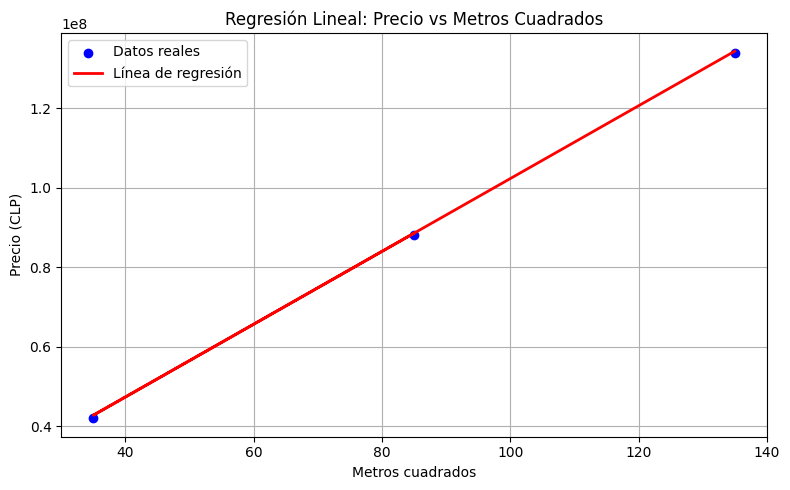

In [19]:
import matplotlib.pyplot as plt

# Asegurarse de tener predicciones listas
y_pred = modelo.predict(X_test)

# Crear gráfico
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')       # Puntos reales
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Línea de regresión') # Línea del modelo

plt.title("Regresión Lineal: Precio vs Metros Cuadrados")
plt.xlabel("Metros cuadrados")
plt.ylabel("Precio (CLP)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



  ##  3. Métricas de evaluación

Ya entrenamos y visualizamos el modelo. Ahora es momento de **cuantificar su rendimiento** con métricas específicas para regresión.

Estas métricas te ayudarán a responder:

- ¿Qué tan buenos son los resultados del modelo?
- ¿Cuánto se equivocó, en promedio?
- ¿Es mejor que una predicción aleatoria?

A continuación, evaluaremos el modelo con 4 métricas clave:

---

###  MAE  Mean Absolute Error (Error absoluto medio)

Promedia la **magnitud de los errores**, sin importar si fueron positivos o negativos.

✔️ Penaliza todos los errores por igual.  
📌 Útil cuando queremos interpretabilidad directa en las mismas unidades que la predicción.

---
### MSE  Mean Squared Error (Error cuadrático medio)

Promedia los **errores al cuadrado**. Penaliza más los errores grandes.

✔️ Útil cuando los errores grandes deben evitarse especialmente.  
⚠️ No está en las mismas unidades que la variable objetivo.

---

###  RMSE –Root Mean Squared Error (Raíz del MSE)

Es simplemente la **raíz cuadrada del MSE**.  
✔️ Se interpreta en las mismas unidades que el precio → más comprensible.

---

###  R² Coeficiente de determinación

Mide **cuánta varianza de los datos explica el modelo**.

✔️ R² = 1 → Ajuste perfecto  
✔️ R² = 0 → No explica nada  
✔️ R² < 0 → Peor que una línea horizontal constante

---


In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calcular métricas
mae = mean_absolute_error(y_test, predicciones)
mse = mean_squared_error(y_test, predicciones)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predicciones)

# Mostrar resultados
print(" Evaluación del modelo:")
print(f"MAE  (Error absoluto medio):     {mae:,.0f} CLP")
print(f"MSE  (Error cuadrático medio):   {mse:,.0f}")
print(f"RMSE (Raíz del error cuadrático): {rmse:,.0f} CLP")
print(f"R²   (Coeficiente de determinación): {r2:.3f}")


 Evaluación del modelo:
MAE  (Error absoluto medio):     567,185 CLP
MSE  (Error cuadrático medio):   356,701,723,921
RMSE (Raíz del error cuadrático): 597,245 CLP
R²   (Coeficiente de determinación): 1.000


##  Visualizando los errores del modelo

Las métricas numéricas como MAE, MSE, RMSE y R² nos entregan un panorama general.  
Pero para comprender **dónde** se equivoca el modelo y en qué magnitud, es útil graficar esos errores.

En esta sección verás dos visualizaciones:

---

### 1. Errores absolutos por observación  
Un gráfico de barras que muestra **cuánto se equivocó el modelo** en cada predicción.

- Alturas más bajas → buenas predicciones  
- Alturas más altas → errores importantes a revisar

---

### 2. Medidor de R²  
Una forma visual y rápida de saber **qué tan bien explica el modelo la variabilidad del precio**.

- R² cercano a 1 → excelente
- R² cercano a 0 → pobre capacidad explicativa
- R² < 0 → el modelo es peor que adivinar un promedio

Vamos a graficar 👇


# Gráfico de errores absolutos

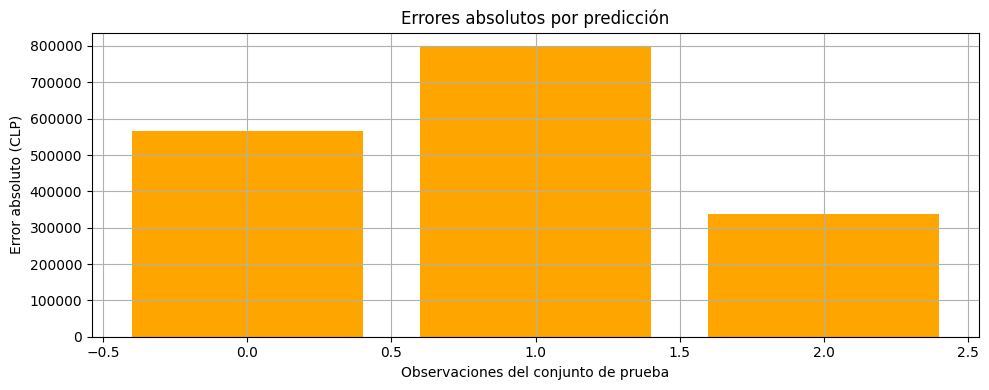

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Calcular errores absolutos
errores = np.abs(y_test.values - predicciones)

# Crear gráfico de barras
plt.figure(figsize=(10, 4))
plt.bar(range(len(errores)), errores, color='orange')
plt.title("Errores absolutos por predicción")
plt.xlabel("Observaciones del conjunto de prueba")
plt.ylabel("Error absoluto (CLP)")
plt.grid(True)
plt.tight_layout()
plt.show()


# Gráfico de errores absolutos

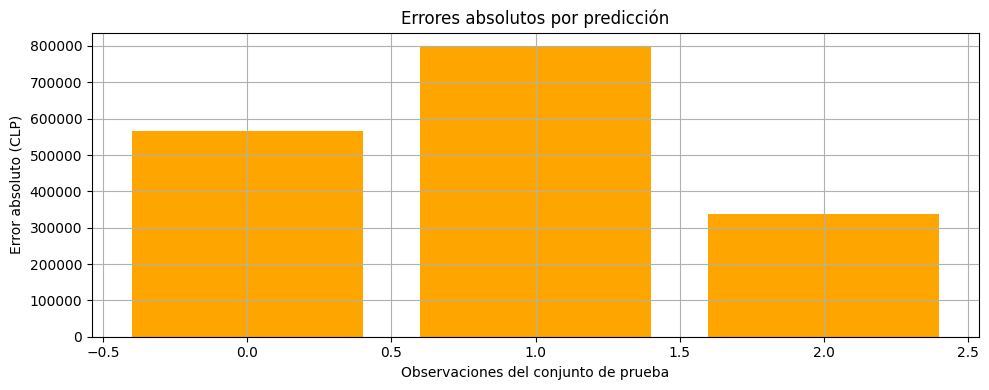

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Calcular errores absolutos
errores = np.abs(y_test.values - predicciones)

# Crear gráfico de barras
plt.figure(figsize=(10, 4))
plt.bar(range(len(errores)), errores, color='orange')
plt.title("Errores absolutos por predicción")
plt.xlabel("Observaciones del conjunto de prueba")
plt.ylabel("Error absoluto (CLP)")
plt.grid(True)
plt.tight_layout()
plt.show()


# Medidor visual para R²

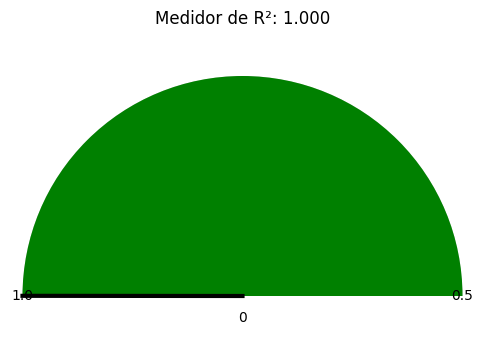

In [24]:
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge

# Normalizar R² entre 0 y 1 para mostrar como medidor
r2_clipped = max(0, min(1, r2))

# Crear medidor tipo velocímetro
fig, ax = plt.subplots(figsize=(6, 4))
ax.axis('equal')
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-0.2, 1.2)

# Dibujar la escala
ax.add_patch(Wedge((0, 0), 1, 0, 180, facecolor="lightgray"))
ax.add_patch(Wedge((0, 0), 1, 0, r2_clipped * 180, facecolor="green"))

# Dibujar la aguja
needle_angle = r2_clipped * 180
x = np.cos(np.radians(needle_angle))
y = np.sin(np.radians(needle_angle))
ax.plot([0, x], [0, y], color="black", linewidth=3)

# Títulos y leyenda
plt.title(f"Medidor de R²: {r2:.3f}")
plt.text(0, -0.1, "0", ha='center', va='center')
plt.text(1, 0, "0.5", ha='center', va='center')
plt.text(-1, 0, "1.0", ha='center', va='center')
plt.axis('off')
plt.show()
